<a href="https://colab.research.google.com/github/Ricard0000/Number_theory_Machine_Learning/blob/main/Number_theory_data_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


**Generate data:** This code will generate numbers of interest to number theorists. This includes integers, primes, divisors, arithmetic functions. The later code will find retationships between these using Machine Learning techniques.

List of prime numbers less than N
[  2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61
  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149 151
 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241 251
 257 263 269 271 277 281 283 293 307 311 313 317 331 337 347 349 353 359
 367 373 379 383 389 397]


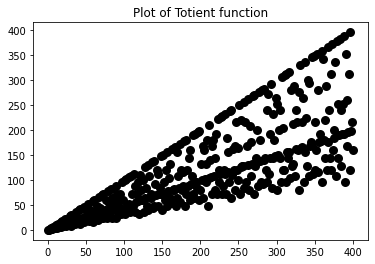

In [23]:
import sys
sys.path.insert(0, '../../Utilities/')
from mpl_toolkits.mplot3d import Axes3D
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io
from scipy.io import savemat
import math 


def divisors(N,divNum):
    A=np.zeros(divNum,dtype=np.int32)
    J=0
    for I in range(1,N+1):
        if np.mod(N,I)==0:
            A[J]=I
            J=J+1
    B=np.zeros(J,dtype=np.int32)
    for I in range(0,J):
        B[I]=A[I]
    if np.size(B)==2:
        p=B[1]
    else:
        p=0
    return A,p
    
def mobius(N,prime_list):
    J=0
    temp_list=0*prime_list
    for I in range(0,np.size(prime_list)):
        if np.mod(N,prime_list[I])==0:
            temp_list[J]=prime_list[I]
            J=J+1
    temp=1
    for I in range(0,J):
        temp=temp*temp_list[I]
    if N==temp:
        val=(-1)**J
    else:
        val=0
    return val

def Liouville(N,prime_list):
    J=0
    raise_power=0*prime_list
    for I in range(0,np.size(prime_list)):
        raise_power[I]=0
        if np.mod(N,prime_list[I])==0:
            while (np.mod(N,prime_list[I]**raise_power[I])==0):
                raise_power[I]=raise_power[I]+1
            raise_power[I]=raise_power[I]-1
        else:
            raise_power[I]=0
    temp=1
    for I in range(0,np.size(prime_list)):
        temp=((-1)**(raise_power[I]))*temp
    val=temp
    return val

def totient(N):
    J=0
    for I in range(0,N):
        if math.gcd(N,I)==1:
            J=J+1
    val=J
    return val

def sigma_alpha_func(N,d,alpha):#(definition: \sigma_{\alpha}(N)=\sum_{d|N} d^{\alpha})
    val=0
    for I in range(0,np.size(d[0,:])):
        val=val+d[N-1,I]**alpha
    return val


def mangolt_func(N,prime_list):
    J=0
    raise_power=0*prime_list
    for I in range(0,np.size(prime_list)):
        raise_power[I]=0
        if np.mod(N,prime_list[I])==0:
            while (np.mod(N,prime_list[I]**raise_power[I])==0):
                raise_power[I]=raise_power[I]+1
            raise_power[I]=raise_power[I]-1

    val1=0.0
    for I in range(0,np.size(prime_list)):
        if (N==prime_list[I]**raise_power[I]):
            val1=np.log(prime_list[I])
        else:
            val2=0.0
    val=max(val1,val2)
    return val

def dirichlet_product(f,g,N,Temp1):
    arith_func=np.zeros(N,dtype=np.int32)
    for I in range(1,N+1):
        for J in range(0,Temp1[I-1]):
            arith_func[I-1]=arith_func[I-1]+f[0,d[I-1,J]-1]*g[0,int((I-1)/d[I-1,J])]
    return arith_func

def inverse(f,N,Temp1):
    if f[0,0]==0:
        print('ERROR: cant invert!')
        f_inv=np.zeros(N,dtype=np.int32)
    else:
        f_inv=np.zeros(N,dtype=np.int32)
        f_inv[0]=1/f[0,0]
        for I in range(1,N+1):
            for J in range(0,Temp1[I-1]):
                f_inv[I-1]=f_inv[I-1]+f[0,int((I-1)/d[I-1,J])]*f_inv[d[I-1,J]-1]
    f_inv[1:N-1]=1/f[0,0]*f_inv[1:N-1]
    return f_inv




#Start Here

N=400
int_list=np.zeros([N],dtype=np.int32)
p=np.zeros([N],dtype=np.int32)
mob=np.zeros([N],dtype=np.int32)
mob[0]=1
tot=np.zeros([N],dtype=np.int32)
tot[0]=1
lio=np.zeros([N],dtype=np.int32)
ident=np.zeros([N],dtype=np.int32)
sigma_alpha=np.zeros([N],dtype=np.int32)
mang=np.zeros([N],dtype=float)

#DATA FOR INTEGERS
for I in range(1,N+1):
    int_list[I-1]=I

#DATA FOR TOTIENT FUNCTION
for I in range(1,N+1):
    tot[I-1]=totient(I)



#DATA FOR DIVISORS
divNum=round(N**(1.5379*np.log(2)/np.log(np.log(N))))+2
d=np.zeros([N,divNum],dtype=np.int32)
for I in range(1,N+1):
    temp,prime=divisors(I,divNum)
    for J in range(0,divNum):
        d[I-1,J]=temp[J]
    p[I-1]=prime
J=0
for I in range(1,N):
    if p[I-1]!=0:
        J=J+1
N_p=J
J=0
prime_list=np.zeros(N_p,dtype=np.int32)
for I in range(1,N):
    if p[I-1]!=0:
        prime_list[J]=p[I-1]
        J=J+1

#DATA FOR MOBIUS FUNCTION
for I in range(2,N+1):
    mob[I-1]=mobius(I,prime_list)


#DATA FOR IDENTITY FUNCTION
ident[0]=1


#DATA for Liouville’s function
lio[0]=1
for I in range(2,N+1):
    lio[I-1]=Liouville(I,prime_list)


#DATA for Divisor functions (definition: \sigma_{\alpha}(N)=\sum_{d|N} d^{\alpha})

sigma_alpha[0]=1
alpha=1
for I in range(2,N+1):
    sigma_alpha[I-1]=sigma_alpha_func(I,d,alpha)

#DATA for Mangolt function
mang[0]=0.0
for I in range(2,N+1):
    mang[I-1]=mangolt_func(I,prime_list)




print('List of prime numbers less than N')
print(prime_list)

"""
print('Integers less than N')
print(int_list)

print('Liovilles Function')
print(lio)

print('Mangolt Function')
print(mang)

print('totient function up to N')
print(tot)

print('evaluating an arithmetic function up to N. (To be generalized later)')
print(arith_func)
"""

fig, axx = plt.subplots(1,1)
plt.scatter(int_list,tot, color='black', linewidth=3)
plt.title('Plot of Totient function')
plt.show()


**Saving data for the following functions:**

1)Identify ($I(n)=1$ for $n=1$, $0$ else.)

2)Integers ($N(n)=n$)

3)Totient function ($\phi(n)$)

4)Mobius function ($\mu(n)$)

5)Prime numbers ($p$)

6)Divisors ($d(n)$, divisors of n)

7)Liouville's Function ($\lambda(n)=(-1)^{a_1+a_2+\cdots+a_m}$, $n=p_1^{a_1}\cdots p_{m}^{a_m}$)

8)Divisor Functions ($\sigma_{\alpha}(n)=\sum_{d|n}d^{\alpha}$)

9)Mangolt Function ($\Lambda(n)=\log(p)$, $n=p^m$, $0$ else.)

In [24]:
savemat('data_number_theory.mat',{'identity':ident,'integers':int_list,'totient':tot, 'mobius':mob, 'primes':prime_list, 'divisors':d, 'liouville':lio, 'sigma_alpha':sigma_alpha, 'mangolt':mang})

In [25]:
data = scipy.io.loadmat('data_number_theory.mat')
identity = data['identity']
integers = data['integers']
totient = data['totient']
mobius = data['mobius']
primes = data['primes']
divisors = data['divisors']
liouville = data['liouville']
sigma_alpha = data['sigma_alpha']
mangolt = data['mangolt']

**How to compute Dirichlet Products:**

$h(n)=\sum_{d|n}f(d)g(\dfrac{n}{d})$

run the code in the cell below.

In [26]:
#Computing Temporary variables needed in future calculations:
Temp1=np.zeros([N],dtype=np.int32)
for I in range(0,N):
    J=0
    while d[I,J]!=0:
        J=J+1
    Temp1[I]=J #This gives the number of divisors for each n

#Computing dirchlet product of f and g: h(n)=\sum_{d|n}f(d)g(n/d)

f=mobius
g=identity

h=dirichlet_product(f,g,N,Temp1) #h=dirichlet product of f and g


**How to compute inverse of $f(n)$:**

(Note: We have to assume $f(1)\neq 0$!)

By definition we have

$f^{-1}(1)=\dfrac{1}{f(1)}$  and,

$f^{-1}(n)=\dfrac{-1}{f(1)}\sum_{d|n,d<n}f(\dfrac{n}{d})f^{-1}(d)$ for $n>1$.




In [28]:
#Computing inverses of arithmetic functions:

f_inverse=inverse(f,N,Temp1)

print(f)
print(f_inverse)
print(f.shape)
print(f_inverse.shape)



[[ 1 -1 -1  0 -1  1 -1  0  0  1 -1  0 -1  1  1  0 -1  0 -1  0  1  1 -1  0
   0  1  0  0 -1 -1 -1  0  1  1  1  0 -1  1  1  0 -1 -1 -1  0  0  1 -1  0
   0  0  1  0 -1  0  1  0  1  1 -1  0 -1  1  0  0  1 -1 -1  0  1 -1 -1  0
  -1  1  0  0  1 -1 -1  0  0  1 -1  0  1  1  1  0 -1  0  1  0  1  1  1  0
  -1  0  0  0 -1 -1 -1  0 -1  1 -1  0 -1 -1  1  0 -1 -1  1  0  0  1  1  0
   0  1  1  0  0  0 -1  0  1 -1 -1  0  1  1  0  0 -1 -1 -1  0  1  1  1  0
   1  1  0  0 -1  0 -1  0  0 -1  1  0 -1  1  1  0  1  0 -1  0 -1  1 -1  0
   0 -1  0  0 -1 -1  0  0  1  1 -1  0 -1 -1  1  0  1 -1  1  0  0 -1 -1  0
  -1  1 -1  0 -1  0 -1  0  1  1  1  0  1  1  0  0  1  1 -1  0  1  1  1  0
   1  1  1  0  1 -1 -1  0  0  1 -1  0 -1 -1 -1  0 -1  0  1  0  1 -1 -1  0
  -1  0  0  0  0 -1  1  0  1  0 -1  0  1  1 -1  0 -1 -1  1  0  0  1 -1  0
   1 -1  1  0 -1  0 -1  0 -1  1  0  0 -1  1  0  0 -1 -1 -1  0 -1 -1  1  0
   0 -1  1  0 -1  0  1  0  0  1  1  0  1  1  1  0  1  0 -1  0  1 -1 -1  0
  -1  1  0  0 -1 -1  1  0  1 -1  1  0 